## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from scipy import stats

In [7]:
# Generate dataset using make_classification function in the sklearn. 
X, y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)
# Convert it into pandas dataframe.
df = pd.DataFrame(data=X, index=range(10000), columns=[1,2,3,4,5,6,7,8])
df.head()

,1,2,3,4,5,6,7,8
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       10000 non-null  float64
 1   2       10000 non-null  float64
 2   3       10000 non-null  float64
 3   4       10000 non-null  float64
 4   5       10000 non-null  float64
 5   6       10000 non-null  float64
 6   7       10000 non-null  float64
 7   8       10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [9]:
df.describe()

,1,2,3,4,5,6,7,8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690


In [13]:
# Check duplicate values and missing data.
print(f"Sum of duplicated values : {df.duplicated().sum()}")
print(f"Sum of missing data : {df.isna().sum().sum()}")

Sum of duplicated values : 0
Sum of missing data : 0


In [21]:
all_df = df.copy()
all_df['label'] = y
display(all_df)
labels = list(set(all_df.label))

,1,2,3,4,5,6,7,8,label
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344,0
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611,1
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524,0
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934,0
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770,0
...,...,...,...,...,...,...,...,...,...
9995,-2.399057,2.275687,-0.345061,0.629983,3.397411,-1.502344,3.098817,0.583324,0
9996,-1.487918,2.273560,-1.152804,2.062795,-0.571202,-5.398310,-2.426969,2.455303,0
9997,0.425978,4.298317,0.536100,-1.266725,1.370092,-3.187447,1.306534,-0.254036,1
9998,-1.182084,0.628536,0.848320,4.571744,3.057226,-4.759462,-2.439117,3.182019,1


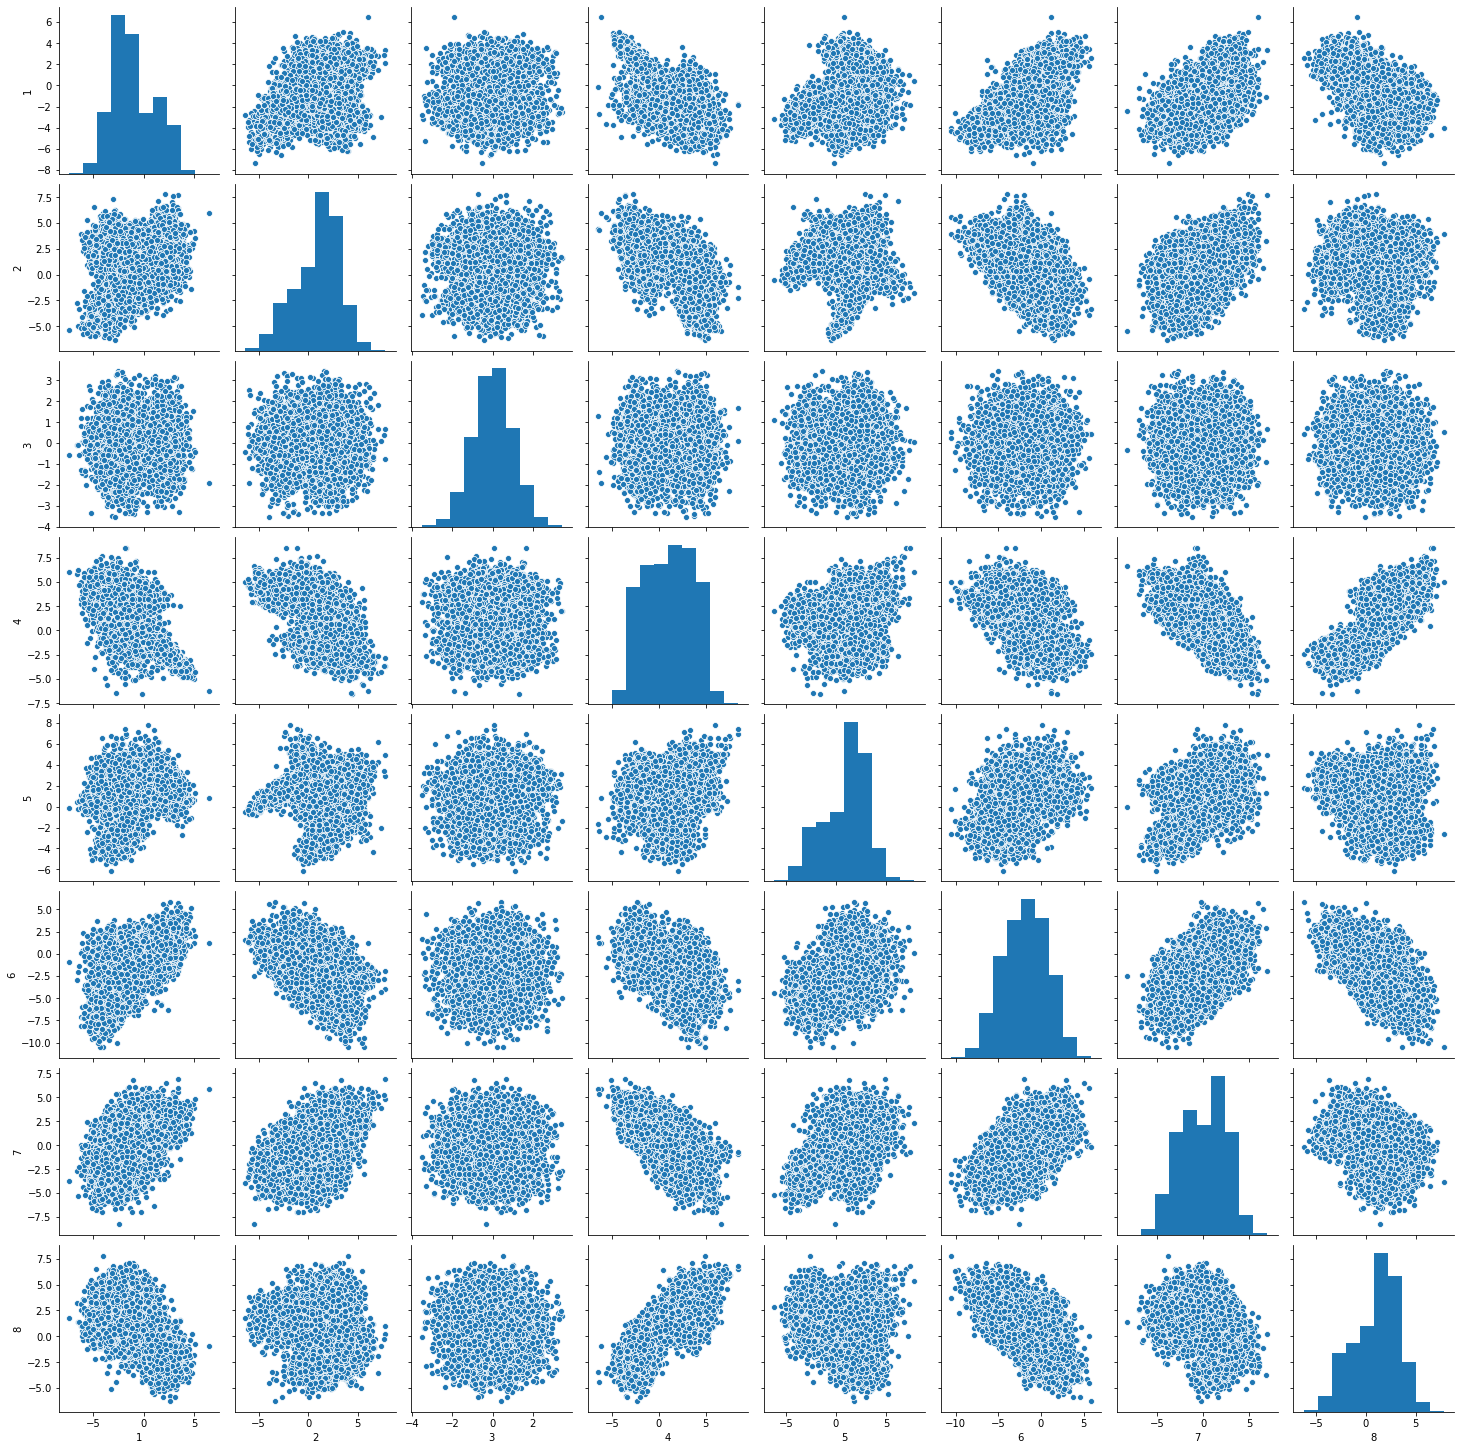

In [22]:
# Visualize data for each feature (pairplot,distplot).
sns.pairplot(df)

In [23]:
# Draw correlation matrix.
all_df.corr()

,1,2,3,4,5,6,7,8,label
1,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540,0.465898
2,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568,-0.444298
3,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107,0.018144
4,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458,-0.034356
5,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576,0.460011
6,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011,0.560296
7,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518,0.002034
8,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000,-0.439571
label,0.465898,-0.444298,0.018144,-0.034356,0.460011,0.560296,0.002034,-0.439571,1.000000


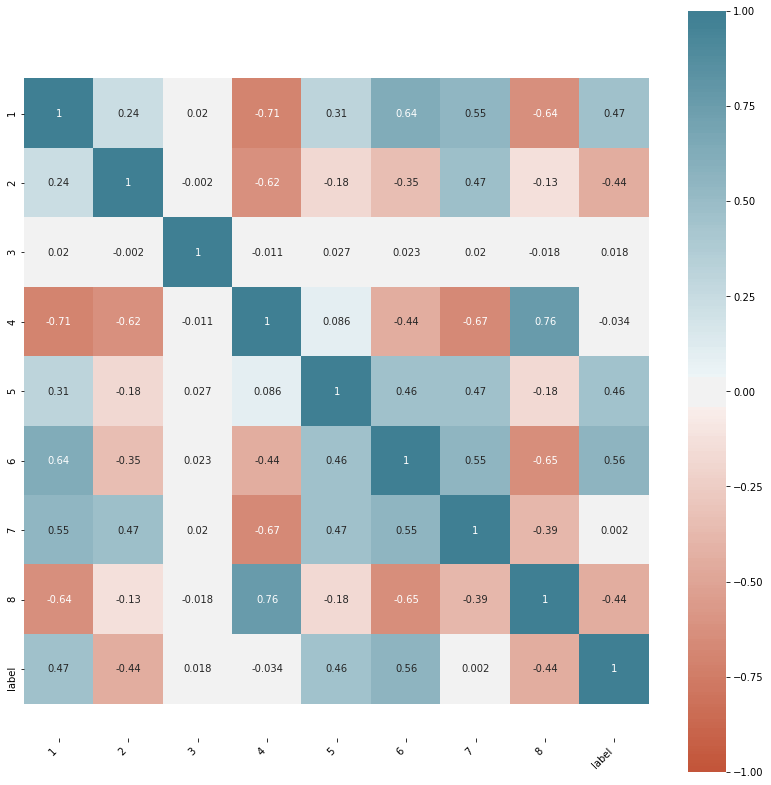

In [24]:
corr = all_df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [25]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
z = np.abs(stats.zscore(df))
z

array([[0.24934109, 0.21155632, 1.54848575, ..., 0.53763097, 0.00566284,
        1.15220659],
       [1.21562472, 1.62265494, 0.52187207, ..., 0.03314851, 1.40338979,
        0.51777165],
       [0.78712613, 0.16242045, 0.25947611, ..., 0.12249416, 0.48387509,
        0.35998293],
       ...,
       [0.67334555, 1.4827283 , 0.52439513, ..., 0.50960652, 0.53475377,
        0.55105502],
       [0.08336999, 0.15830524, 0.83152777, ..., 1.11728642, 0.99626339,
        0.9651887 ],
       [0.66636667, 0.73903683, 0.68826729, ..., 1.01941697, 1.24352619,
        1.01322073]])

In [26]:
outliers = list(set(np.where(z > 3)[0]))
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)

y_new = y[list(new_df["index"])]

new_df.drop(['index'], axis=1, inplace=True)

In [27]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
#our data is balanced

{0: 5006, 1: 4994}

In [29]:
# Split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(new_df ,y_new, test_size=0.3, random_state=42)

In [30]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9637879005604254
Accuracy of test: 0.9654710023466309


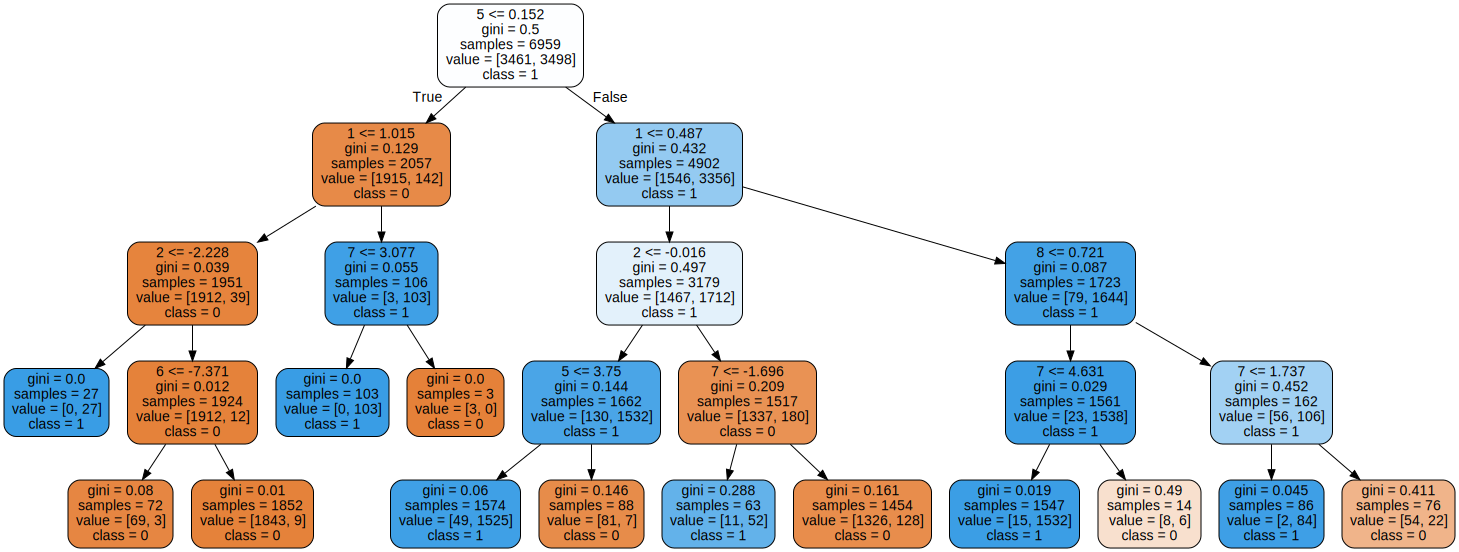

In [31]:
# Visualize feature importances.
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Program Files\Graphviz'
import graphviz

dot_df = export_graphviz(clf, out_file=None,
                     feature_names=df.columns,
                     class_names=['0', '1'],
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph

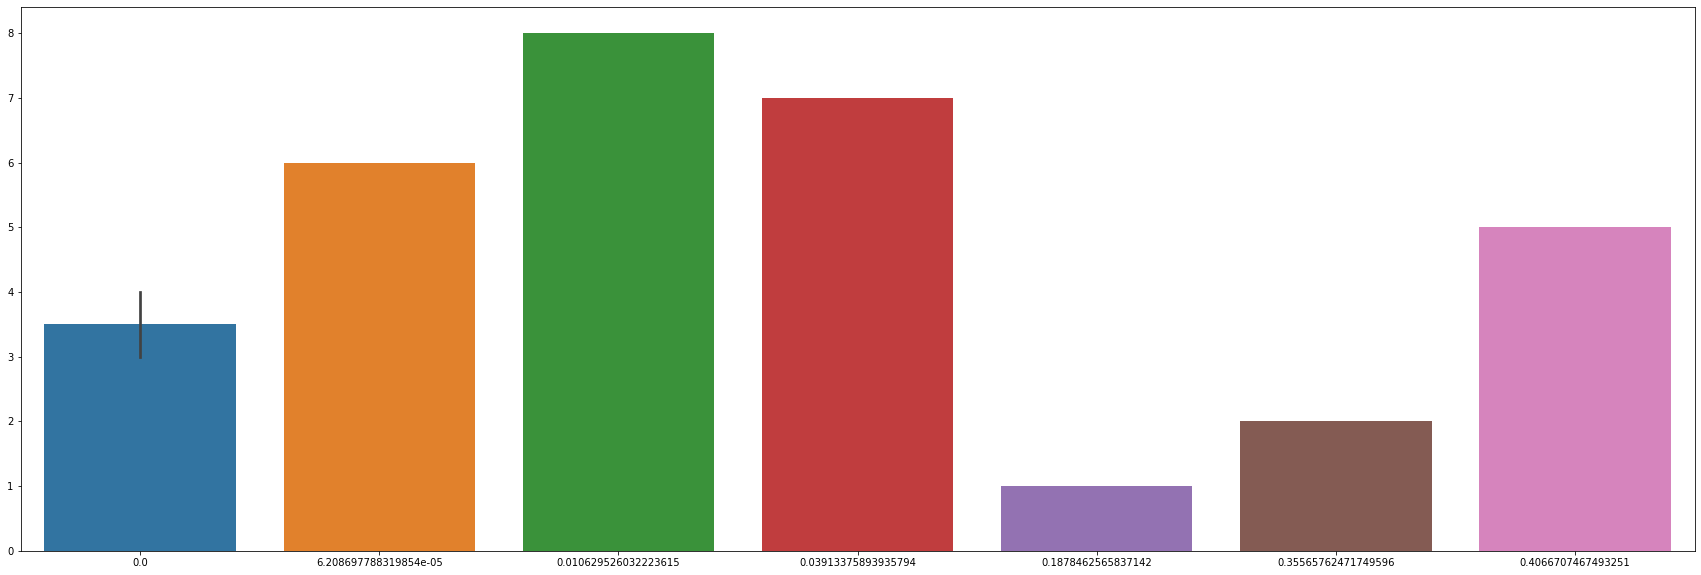

In [33]:
plt.figure(figsize=(30, 10))
importance = clf.feature_importances_
sns.barplot(x=importance, y=df.columns)
plt.show()

In [34]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1527
           1       0.98      0.94      0.96      1456

    accuracy                           0.97      2983
   macro avg       0.97      0.96      0.97      2983
weighted avg       0.97      0.97      0.97      2983



In [35]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9665900447816028
Recall = 0.9649803986125204
Accuracy = 0.9654710023466309
F1 Score = 0.9654052986531725


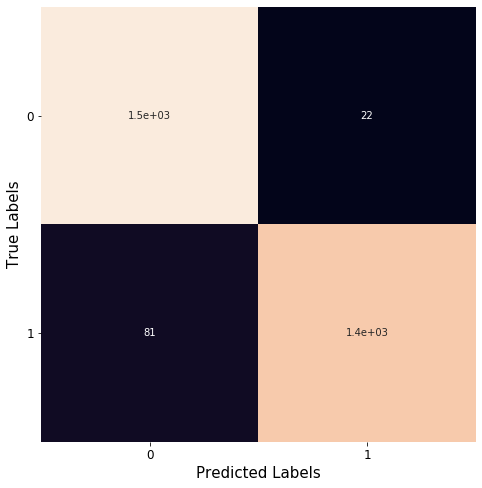

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(labels, fontsize = 12)
ax.yaxis.set_ticklabels(labels, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [38]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3,
        'eval_metric': 'mlogloss'}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

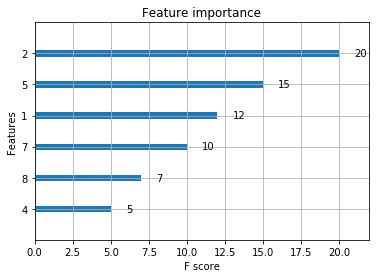

In [39]:
# Visualize feature importances.
xgb.plot_importance(model)

In [40]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
preds = model.predict(dmatrix_test)

In [41]:
best_preds = np.asarray([np.argmax(line) for line in preds])
best_preds

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [42]:
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Accuracy = 0.9839088166275561
Recall = 0.983931629928683
Precision = 0.9838733034116155
F1 Score = 0.9654052986531725


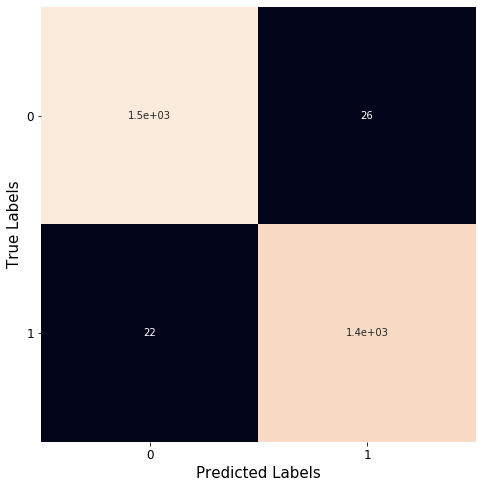

In [43]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [44]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=2000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, eval_metric='mlogloss', seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("\nTuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



Tuned: {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 2000}
Mean of the cv scores is 0.986061
Train Score 1.000000
Test Score 0.991284
Seconds used for refitting the best model on the train dataset: 23.495790


Text(204.36, 0.5, 'True Labels')

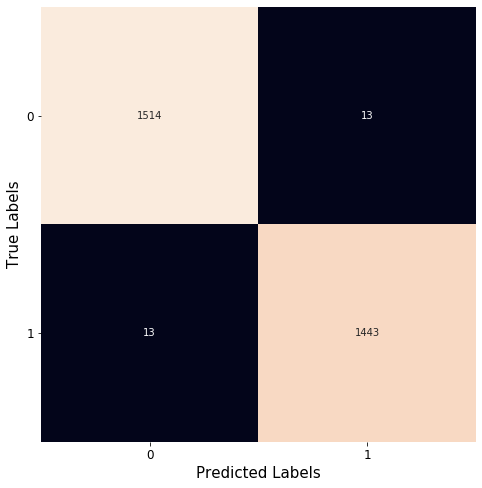

In [45]:
plt.figure(figsize=(12, 8))

xgb_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, xgb_pred)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)

By using GridSearchCV the accuracy got really high and we can say that XGBoost Algorithm (using GridSearchCV) gives a lot better results than DecisionTree.